**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [43]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy import stats
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [91]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

   
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = np.array(X).astype(float)
        self.y_train = np.array(y).astype(int)
        self.n_classes = np.unique(self.y_train)
        self.norm_distance = (self.X_train ** 2).sum(axis=1).reshape(1, -1)

        if self.algorithm == 'kd_tree':
            self.kdtree = KDTree(self.X_train, leaf_size=60)


    def predict(self, X):
    #Predict the class labels for the provided data
        close = np.array([])
        if self.algorithm == 'kd_tree':
            _, close_index = self.kdtree.query(np.array(X).astype(float),k=self.n_neighbors)
            close = self.y_train[close_index]

        else:
            distance = self.calculate_dist(np.array(X).astype(float))
            close = self.y_train[np.argsort(distance)[:, :self.n_neighbors]]

        return np.apply_along_axis(lambda n: np.bincount(n).argmax(), axis=1, arr=close)
            

    def predict_proba(self, X):
   #Return probability estimates for the test data X.
        X = np.array(X).astype(float)
        test_size = X.shape[0]
        close_index = np.array([])
        prediction = np.zeros((test_size, self.n_classes.shape[0]))

        if self.algorithm == 'kd_tree':
            _, close_index = self.kdtree.query(X, k=self.n_neighbors)

        else:
            distance = self.calculate_dist(X)
            close_index = np.argsort(distance)[:, :self.n_neighbors]

        for i in range(test_size):
            for j in close_index[i]:
                prediction[i][self.y_train[j]] += 1

        result = prediction / self.n_neighbors
        return result
    
    
    def calculate_dist(self, test_X):
        test_norm_distance = (test_X**2).sum(axis=1).reshape(-1, 1)
        return np.sqrt(test_norm_distance + self.norm_distance - 2*np.dot(test_X, self.X_train.T))

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.array([1 for i, x in enumerate(y_pred)
                        if x == y[i]]).sum(axis=0) / len(y)

**IRIS**

In [92]:
iris = datasets.load_iris()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [94]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [95]:
%time clf.fit(X_train, y_train)

CPU times: user 853 µs, sys: 335 µs, total: 1.19 ms
Wall time: 885 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [96]:
%time my_clf.fit(X_train, y_train)

CPU times: user 549 µs, sys: 221 µs, total: 770 µs
Wall time: 583 µs


In [97]:
%time clf.predict(X_test)

CPU times: user 1.16 ms, sys: 304 µs, total: 1.47 ms
Wall time: 1.17 ms


array([1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0])

In [98]:
%time my_clf.predict(X_test)

CPU times: user 1.06 ms, sys: 681 µs, total: 1.74 ms
Wall time: 1 ms


array([1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0])

In [99]:
%time clf.predict_proba(X_test)

CPU times: user 733 µs, sys: 262 µs, total: 995 µs
Wall time: 738 µs


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [100]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.13 ms, sys: 788 µs, total: 1.92 ms
Wall time: 1.17 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [101]:
clf.score(X_test, y_test)

1.0

In [102]:
my_clf.score(X_test, y_test)

1.0

Задание 3

/Users/P_Moiseenkov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in sqrt


Optimum quantity of neigbors is 10


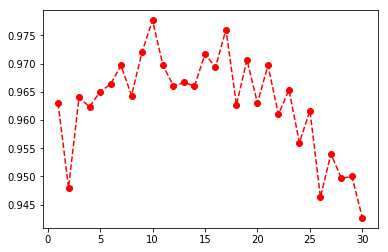

In [103]:
#%%pycodestyle
max_neighbors = 30
number_of_tests = 200
scores = []

for i in range(1, max_neighbors+1):
    testing_scores = []
    for j in range(number_of_tests):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target,
            test_size=0.1, stratify=iris.target
        )
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        testing_scores.append(my_clf.score(X_test, y_test))
    scores.append(np.mean(testing_scores))

best_n = np.argmax(scores) + 1
print("Optimum quantity of neigbors is {}".format(best_n))

plt.plot(range(1, max_neighbors+1), scores, 'ro--')
plt.show()

**MNIST**

In [104]:
mnist = fetch_mldata('MNIST original')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [106]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [107]:
%time clf.fit(X_train, y_train)

CPU times: user 35.1 s, sys: 390 ms, total: 35.4 s
Wall time: 35.7 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [108]:
%time my_clf.fit(X_train, y_train)

CPU times: user 647 ms, sys: 514 ms, total: 1.16 s
Wall time: 906 ms


In [109]:
%time clf.predict(X_test)

CPU times: user 53.1 s, sys: 225 ms, total: 53.3 s
Wall time: 53.3 s


array([2., 8., 7., 1., 1., 6., 6., 9., 3., 0., 8., 3., 1., 8., 7., 9., 0.,
       5., 3., 5., 6., 9., 0., 0., 7., 4., 6., 5., 0., 0., 4., 7., 3., 2.,
       8., 3., 9., 0., 8., 1., 9., 2., 7., 7., 7., 9., 5., 5., 9., 1., 7.,
       4., 1., 2., 9., 7., 1., 6., 6., 3., 3., 4., 1., 5., 7., 1., 5., 1.,
       3., 1., 0., 2., 3., 8., 2., 2., 3., 4., 8., 6., 8., 7., 4., 9., 2.,
       5., 7., 0., 4., 6., 6., 0., 1., 7., 7., 9., 9., 6., 5., 1., 4., 1.,
       7., 0., 0., 1., 1., 3., 9., 6., 8., 9., 9., 3., 1., 3., 8., 9., 1.,
       9., 1., 9., 0., 4., 0., 8., 3., 5., 9., 3., 6., 3., 3., 7., 6., 6.,
       8., 9., 6., 9., 6., 2., 5., 5., 0., 2., 5., 6., 7., 2., 3., 0., 5.,
       6., 0., 4., 2., 6., 7., 5., 3., 0., 6., 3., 9., 6., 6., 2., 9., 7.,
       1., 4., 7., 7., 5., 2., 4., 5., 1., 8., 3., 5., 1., 0., 9., 2., 6.,
       2., 7., 4., 1., 7., 0., 2., 4., 1., 5., 4., 8., 2., 0., 7., 9., 8.,
       4., 1., 6., 0., 3., 7., 4., 3., 3., 3., 3., 2., 1., 0., 9., 2., 4.,
       9., 8., 8., 7., 0.

In [110]:
%time my_clf.predict(X_test)

CPU times: user 6.65 s, sys: 736 ms, total: 7.38 s
Wall time: 6.05 s


array([2, 8, 7, 1, 1, 6, 6, 9, 3, 0, 8, 3, 1, 8, 7, 9, 0, 5, 3, 5, 6, 9,
       0, 0, 7, 4, 6, 5, 0, 0, 4, 7, 3, 2, 8, 3, 9, 0, 8, 1, 9, 2, 7, 7,
       7, 9, 5, 5, 9, 1, 7, 4, 1, 2, 9, 7, 1, 6, 6, 3, 3, 4, 1, 5, 7, 1,
       5, 1, 3, 1, 0, 2, 3, 8, 2, 2, 3, 4, 8, 6, 8, 7, 4, 9, 2, 5, 7, 0,
       4, 6, 6, 0, 1, 7, 7, 9, 9, 6, 5, 1, 4, 1, 7, 0, 0, 1, 1, 3, 9, 6,
       8, 9, 9, 3, 1, 3, 8, 9, 1, 9, 1, 9, 0, 4, 0, 8, 3, 5, 9, 3, 6, 3,
       3, 7, 6, 6, 8, 9, 6, 9, 6, 2, 5, 5, 0, 2, 5, 6, 7, 2, 3, 0, 5, 6,
       0, 4, 2, 6, 7, 5, 3, 0, 6, 3, 9, 6, 6, 2, 9, 7, 1, 4, 7, 7, 5, 2,
       4, 5, 1, 8, 3, 5, 1, 0, 9, 2, 6, 2, 7, 4, 1, 7, 0, 2, 4, 1, 5, 4,
       8, 2, 0, 7, 9, 8, 4, 1, 6, 0, 3, 7, 4, 3, 3, 3, 3, 2, 1, 0, 9, 2,
       4, 9, 8, 8, 7, 0, 0, 7, 8, 9, 7, 2, 2, 3, 2, 2, 7, 6, 0, 0, 5, 2,
       4, 2, 2, 8, 3, 7, 0, 7, 3, 8, 8, 1, 0, 5, 3, 1, 6, 3, 1, 0, 3, 5,
       7, 9, 6, 0, 7, 3, 2, 7, 9, 6, 1, 3, 8, 1, 0, 4, 0, 9, 2, 0, 4, 4,
       8, 8, 3, 3, 8, 3, 5, 3, 9, 8, 8, 9, 8, 4, 0,

In [111]:
%time clf.predict_proba(X_test)

CPU times: user 54.4 s, sys: 146 ms, total: 54.5 s
Wall time: 54.8 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [112]:
%time my_clf.predict_proba(X_test)

CPU times: user 6.62 s, sys: 647 ms, total: 7.26 s
Wall time: 5.97 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [113]:
clf.score(X_test, y_test)

0.96

In [114]:
my_clf.score(X_test, y_test)

0.96

Задание 4

In [115]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [116]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [117]:
%time clf.fit(X_train, y_train)

CPU times: user 32.9 s, sys: 302 ms, total: 33.2 s
Wall time: 33.2 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [118]:
%time my_clf.fit(X_train, y_train)

CPU times: user 33 s, sys: 629 ms, total: 33.6 s
Wall time: 33 s


In [119]:
%time clf.predict(X_test)

CPU times: user 52.6 s, sys: 64.3 ms, total: 52.7 s
Wall time: 52.8 s


array([1., 2., 2., 6., 7., 3., 5., 9., 5., 0., 1., 9., 9., 3., 0., 2., 1.,
       9., 9., 2., 4., 7., 5., 2., 4., 2., 8., 8., 9., 3., 0., 4., 2., 7.,
       6., 3., 4., 4., 9., 1., 6., 3., 8., 9., 9., 9., 5., 0., 6., 1., 0.,
       2., 3., 4., 2., 1., 2., 6., 2., 2., 9., 2., 4., 0., 3., 8., 0., 3.,
       7., 6., 3., 6., 9., 5., 7., 9., 2., 0., 4., 9., 2., 3., 0., 5., 7.,
       5., 5., 4., 5., 4., 0., 6., 1., 0., 3., 4., 4., 2., 1., 4., 9., 8.,
       0., 8., 1., 7., 9., 1., 7., 7., 2., 1., 9., 3., 6., 8., 8., 4., 9.,
       0., 2., 5., 1., 9., 7., 0., 0., 5., 2., 9., 4., 5., 0., 9., 8., 1.,
       9., 7., 0., 4., 4., 4., 4., 2., 1., 1., 7., 7., 3., 3., 1., 7., 1.,
       3., 7., 7., 9., 0., 5., 5., 5., 2., 6., 4., 0., 6., 1., 1., 4., 0.,
       5., 1., 8., 7., 1., 5., 6., 4., 8., 8., 4., 8., 1., 8., 1., 5., 4.,
       0., 5., 6., 1., 6., 6., 7., 0., 1., 2., 8., 6., 9., 5., 3., 5., 4.,
       2., 5., 0., 5., 7., 8., 2., 9., 6., 9., 5., 4., 1., 9., 4., 8., 3.,
       5., 4., 6., 3., 6.

In [120]:
%time my_clf.predict(X_test)

CPU times: user 45.4 s, sys: 110 ms, total: 45.5 s
Wall time: 45.7 s


array([1, 2, 2, 6, 7, 3, 5, 9, 5, 0, 1, 9, 9, 3, 0, 2, 1, 9, 9, 2, 4, 7,
       5, 2, 4, 2, 8, 8, 9, 3, 0, 4, 2, 7, 6, 3, 4, 4, 9, 1, 6, 3, 8, 9,
       9, 9, 5, 0, 6, 1, 0, 2, 3, 4, 2, 1, 2, 6, 2, 2, 9, 2, 4, 0, 3, 8,
       0, 3, 7, 6, 3, 6, 9, 5, 7, 9, 2, 0, 4, 9, 2, 3, 0, 5, 7, 5, 5, 4,
       5, 4, 0, 6, 1, 0, 3, 4, 4, 2, 1, 4, 9, 8, 0, 8, 1, 7, 9, 1, 7, 7,
       2, 1, 9, 3, 6, 8, 8, 4, 9, 0, 2, 5, 1, 9, 7, 0, 0, 5, 2, 9, 4, 5,
       0, 9, 8, 1, 9, 7, 0, 4, 4, 4, 4, 2, 1, 1, 7, 7, 3, 3, 1, 7, 1, 3,
       7, 7, 9, 0, 5, 5, 5, 2, 6, 4, 0, 6, 1, 1, 4, 0, 5, 1, 8, 7, 1, 5,
       6, 4, 8, 8, 4, 8, 1, 8, 1, 5, 4, 0, 5, 6, 1, 6, 6, 7, 0, 1, 2, 8,
       6, 9, 5, 3, 5, 4, 2, 5, 0, 5, 7, 8, 2, 9, 6, 9, 5, 4, 1, 9, 4, 8,
       3, 5, 4, 6, 3, 6, 3, 7, 7, 6, 5, 0, 6, 9, 0, 1, 4, 6, 8, 3, 4, 7,
       1, 5, 1, 0, 6, 0, 1, 1, 9, 7, 2, 9, 7, 8, 4, 7, 2, 8, 1, 4, 9, 6,
       3, 1, 2, 3, 7, 0, 2, 1, 3, 5, 4, 7, 3, 9, 4, 1, 7, 5, 3, 1, 7, 6,
       9, 6, 6, 8, 4, 2, 1, 2, 1, 1, 2, 0, 7, 6, 8,

In [121]:
%time clf.predict_proba(X_test)

CPU times: user 52.6 s, sys: 59.8 ms, total: 52.7 s
Wall time: 52.7 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [122]:
%time my_clf.predict_proba(X_test)

CPU times: user 44.2 s, sys: 49.9 ms, total: 44.2 s
Wall time: 44.3 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [123]:
clf.score(X_test, y_test)

0.9671428571428572

In [124]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 5

In [66]:
# seaborn - библиотека, основанная на matplotlib для визуализации данных. Проще, чем matplotlib

# matplotlib - библиотека для визуализации данных 

# train_test_split - с помощью этой функции можно разбиить исходную выборку данных на части: ренировочную и тестовую

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - используетсядля послежовательного преобразования данных

# StandardScaler (from sklearn.preprocessing import StandardScaler) - Стандартизация данных: 
#распределение будет иметь среднее значение 0 и стандартное отклонение 1

# ClassifierMixin -  Базовый класс для всех классификаторов sklearn

# NeighborsBase - базовый класс для knn

# KNeighborsMixin - базовый класс для knn, содаржащий поиск соседей

# SupervisedIntegerMixin - базовый класс, содержащий метод fit